# PSO effective-mass

20 November 2019

Another probe of the effective mass function, this time fitting to a small number of interlopers as subhalos.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

from pso import PSOFit

from helpers import get_mass_back

In [2]:
## General settings ##
zl = .2
zs = 1.0

In [3]:
# zds = [.1,.2,.3,.4,.5,.6,.7,.8,.9] * 2
# seeds = [100] * 9 + [101] * 9
# zds = [.1,.2,.3, .4,.5,.6,.9]
# seeds = [100]*7
# zds = [.3]*4+[.5]*4+[.7]*4
# seeds = [101,102,103,104]*3
# zds = [.10,.15,.2,.25]
# seeds = [100]*4
# zds = [.05,.3,.4,.5,.6,.7,.8,.9]
# seeds = [100] * 8
# zds = [.05,.10,.15,.2,.25,.3,.35,.4,.5,.6,.7,.8,.9]
# seeds = [100]*13
#zds = [.05,.10,.15,.2,.25,.3,.35,.4]
#zds = [.03,.08,.13,.18]
#seeds = [103]*8
zds = [.6,.6,.6,.8,.8,.8]
seeds = [101,102,103,101,102,103]
assert(len(zds) == len(seeds))
ilist = range(len(zds))
ncores = 4
N=1 # number of subhalos

In [281]:
def pso_fit_func(i, zd, seed):
    '''
    Just a helper function for multiprocessing.Pool
    '''
    print('running', i)
    ans = PSOFit(N=N, zd=zd, zl=zl, zs=zs,seed=seed, numiter=300, near_ring=True)

    #pso_fit_list[i] = ans
    #ans = 'PSOFIT{}'.format(i)
    return i, ans

class CallbackList:
    def __init__(self,length):
        self.liszt = [None]*length
    
    def __repr__(self):
        return 'CallbackList'+self.liszt.__repr__()
    
    def callback(self, result):
        print('callback')
        assert(len(result) == 2)
        self.liszt[result[0]] = result[1]
        print('my list is now', self.liszt)

pso_fit_callback_list = CallbackList(len(zds))

In [282]:
%%time
with Pool(ncores) as pool:
    p_list = []
    for i, zd, seed in zip(ilist, zds, seeds):
        p = pool.apply_async(pso_fit_func, args=(i,zd, seed), callback=pso_fit_callback_list.callback)
        p_list.append(p)

    for p in p_list:
        p.wait()
        
    for p in p_list:
        p.get()

running 1
running 3
running 0
running 2


2019-12-03 02:11:20,719 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
2019-12-03 02:11:20,722 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
2019-12-03 02:11:20,732 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/3002019-12-03 02:11:20,736 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=79.7
2019-12-03 02:21:29,003 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 79.68514814339073, best pos: [-0.12418454 -2.53445926 -7.77746507 -9.06988933]


running 4


2019-12-03 02:21:29,190 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=176
2019-12-03 02:21:29,286 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 175.9837258351294, best pos: [ 0.31063029 -2.51344064 -5.9261828   5.48951654]


callback
my list is now [None, <pso.PSOFit object at 0x7f9b68db06d8>, None, None, None, None]
running 5


2019-12-03 02:21:29,422 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [None, <pso.PSOFit object at 0x7f9b68db06d8>, <pso.PSOFit object at 0x7f9b6896cf98>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=61.4
2019-12-03 02:21:31,663 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 61.39311590154219, best pos: [  0.60096547  -2.69430598 -14.99829263  -6.63405066]


callback
my list is now [<pso.PSOFit object at 0x7f9b6896cb70>, <pso.PSOFit object at 0x7f9b68db06d8>, <pso.PSOFit object at 0x7f9b6896cf98>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=40.6
2019-12-03 02:21:32,427 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 40.641012097014624, best pos: [  1.57891862  -3.03148712 -14.75945249  -0.93856911]


callback
my list is now [<pso.PSOFit object at 0x7f9b6896cb70>, <pso.PSOFit object at 0x7f9b68db06d8>, <pso.PSOFit object at 0x7f9b6896cf98>, <pso.PSOFit object at 0x7f9b442f1828>, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=92.8
2019-12-03 02:28:44,208 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 92.82018840004687, best pos: [  1.18481786  -2.91314092 -14.99823883   7.67779093]
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=55.2
2019-12-03 02:28:44,254 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 55.1516807749868, best pos: [ 0.18347862 -2.96009579 -8.94335371 -8.31042693]


callback
my list is now [<pso.PSOFit object at 0x7f9b6896cb70>, <pso.PSOFit object at 0x7f9b68db06d8>, <pso.PSOFit object at 0x7f9b6896cf98>, <pso.PSOFit object at 0x7f9b442f1828>, None, <pso.PSOFit object at 0x7f9b44514240>]
callback
my list is now [<pso.PSOFit object at 0x7f9b6896cb70>, <pso.PSOFit object at 0x7f9b68db06d8>, <pso.PSOFit object at 0x7f9b6896cf98>, <pso.PSOFit object at 0x7f9b442f1828>, <pso.PSOFit object at 0x7f9b4221f8d0>, <pso.PSOFit object at 0x7f9b44514240>]
CPU times: user 3.96 s, sys: 1.56 s, total: 5.52 s
Wall time: 17min 23s


With `n_particles = 32`:
* 3 at a time : 5min14 (300 iterations, N=2)
* 2 at a time : 4min2 (300 iterations, N=2)
* 7 : 9min10 (300 iterations, N=1)
* 1 : 3min2 (300 iterations, N=1)
* 4 : 1min50 (100 iterations, N=1)

In [110]:
#pso_fit_list_old = pso_fit_list

In [283]:
pso_fit_list = list(pso_fit_callback_list.liszt)

In [284]:
# pso_fit_list = pso_fit_callback_list2.liszt

In [285]:
for pso_fit in pso_fit_list:
    print(pso_fit.almost_truth_args)

[-0.8223373312784534, -2.209860883883607, array(-1.98369218), array(-0.94363805)]
[-0.8223373312784534, -2.209860883883607, array(-1.00075452), array(-1.99457115)]
[-0.8223373312784534, -2.209860883883607, array(0.99008062), array(1.91968404)]
[-0.8720499597989692, -2.4883351909438343, array(-0.83094966), array(-0.39528095)]
[-0.8720499597989692, -2.4883351909438343, array(-0.41920649), array(-0.83550676)]
[-0.8720499597989692, -2.4883351909438343, array(0.4147353), array(0.80413727)]


In [286]:
zds

[0.6, 0.6, 0.6, 0.8, 0.8, 0.8]

In [287]:
seeds

[101, 102, 103, 101, 102, 103]

In [288]:
import pickle
with open('mydict2.p', 'rb') as f:
    mydict = pickle.load(f)

In [289]:
mydict

{(0.03, 102): <pso.PSOFit at 0x7f9b41f656d8>,
 (0.05, 100): <pso.PSOFit at 0x7f9b4214d320>,
 (0.05, 101): <pso.PSOFit at 0x7f9b41f87278>,
 (0.05, 102): <pso.PSOFit at 0x7f9b445184a8>,
 (0.05, 103): <pso.PSOFit at 0x7f9b5d5b3438>,
 (0.08, 102): <pso.PSOFit at 0x7f9b4216a828>,
 (0.1, 100): <pso.PSOFit at 0x7f9b41f5ce48>,
 (0.1, 101): <pso.PSOFit at 0x7f9b421a0128>,
 (0.1, 102): <pso.PSOFit at 0x7f9b421847f0>,
 (0.1, 103): <pso.PSOFit at 0x7f9b41f5b710>,
 (0.13, 102): <pso.PSOFit at 0x7f9b41f9a7f0>,
 (0.15, 100): <pso.PSOFit at 0x7f9b5d5b6400>,
 (0.15, 101): <pso.PSOFit at 0x7f9b5d5be358>,
 (0.15, 102): <pso.PSOFit at 0x7f9b4218b0b8>,
 (0.15, 103): <pso.PSOFit at 0x7f9b42153470>,
 (0.18, 102): <pso.PSOFit at 0x7f9b44517c88>,
 (0.2, 100): <pso.PSOFit at 0x7f9b5d5b9b70>,
 (0.2, 101): <pso.PSOFit at 0x7f9b4217fdd8>,
 (0.2, 102): <pso.PSOFit at 0x7f9b421b4898>,
 (0.2, 103): <pso.PSOFit at 0x7f9b41f62ef0>,
 (0.25, 100): <pso.PSOFit at 0x7f9b41f9c9b0>,
 (0.25, 101): <pso.PSOFit at 0x7f9b4213dcf

In [290]:
#mydict = {}
for zd, seed, pso_fit in zip(zds, seeds, pso_fit_list):
    mydict[(zd,seed)] = pso_fit

In [291]:
mydict

{(0.03, 102): <pso.PSOFit at 0x7f9b41f656d8>,
 (0.05, 100): <pso.PSOFit at 0x7f9b4214d320>,
 (0.05, 101): <pso.PSOFit at 0x7f9b41f87278>,
 (0.05, 102): <pso.PSOFit at 0x7f9b445184a8>,
 (0.05, 103): <pso.PSOFit at 0x7f9b5d5b3438>,
 (0.08, 102): <pso.PSOFit at 0x7f9b4216a828>,
 (0.1, 100): <pso.PSOFit at 0x7f9b41f5ce48>,
 (0.1, 101): <pso.PSOFit at 0x7f9b421a0128>,
 (0.1, 102): <pso.PSOFit at 0x7f9b421847f0>,
 (0.1, 103): <pso.PSOFit at 0x7f9b41f5b710>,
 (0.13, 102): <pso.PSOFit at 0x7f9b41f9a7f0>,
 (0.15, 100): <pso.PSOFit at 0x7f9b5d5b6400>,
 (0.15, 101): <pso.PSOFit at 0x7f9b5d5be358>,
 (0.15, 102): <pso.PSOFit at 0x7f9b4218b0b8>,
 (0.15, 103): <pso.PSOFit at 0x7f9b42153470>,
 (0.18, 102): <pso.PSOFit at 0x7f9b44517c88>,
 (0.2, 100): <pso.PSOFit at 0x7f9b5d5b9b70>,
 (0.2, 101): <pso.PSOFit at 0x7f9b4217fdd8>,
 (0.2, 102): <pso.PSOFit at 0x7f9b421b4898>,
 (0.2, 103): <pso.PSOFit at 0x7f9b41f62ef0>,
 (0.25, 100): <pso.PSOFit at 0x7f9b41f9c9b0>,
 (0.25, 101): <pso.PSOFit at 0x7f9b4213dcf

In [292]:
# with open('mydict2.p', 'wb') as f:
#     pickle.dump(mydict, f)

In [312]:
zds = []
seeds = []
pso_fit_list = []
for (zd,seed),pf in sorted(mydict.items()):
    if seed==100:
        zds.append(zd)
        seeds.append(seed)
        pso_fit_list.append(pf)

In [313]:
print(zds)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


### Smooth model

In [331]:
fit0 = PSOFit(N=0, zd=zd, zl=zl, zs=zs,numiter=1)
image0 = fit0.pso_img # dumb hacky way to generate smooth-model image

2019-12-03 04:54:15,297 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=8.73e-22
2019-12-03 04:54:16,119 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.726744055505752e-22, best pos: [-0.3308262  -3.78784139]


In [332]:
vmin = -.1; vmax=.1

Cost for smooth model: 157.7900918625754


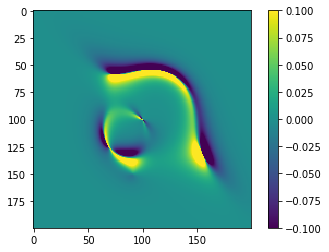

In [338]:
# Cost of the smooth model!!
def error(image1, image2):
    assert(image1.shape == image2.shape)

    diffsq = (image1 - image2).flatten()**2

    skipidx = 20100 # should probably keep this
    return np.sum(diffsq[:skipidx]) + np.sum(diffsq[skipidx+1:])
smooth_cost_list = [error(pf.image, image0) for pf in pso_fit_list]
print('Cost for smooth model:', smooth_cost)

# For comparison, this is the same image without any subhalos
plt.imshow(image0 - pso_fit_list[0].image, vmin=vmin, vmax=vmax)
plt.colorbar()

In [317]:
from helpers import xi_to_pix, x_to_xi

In [318]:
pixsize=0.2
pixnum=200
xpix = xi_to_pix(x_to_xi(pso_fit_list[0].almost_truth_args[2], zl),zl,pixsize,pixnum)
ypix = xi_to_pix(x_to_xi(pso_fit_list[0].almost_truth_args[3], zl),zl,pixsize,pixnum)

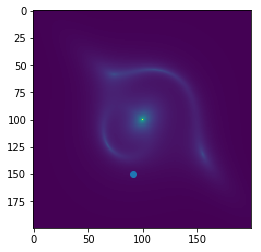

In [319]:
plt.imshow(pso_fit_list[0].image)
plt.scatter([xpix],[ypix])
#plt.scatter([ypix],[xpix])

### Back to subhalo models

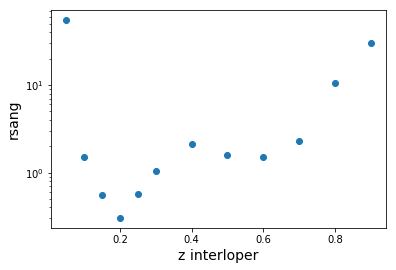

In [320]:
plt.plot(zds, [10**pf.pos[0] for pf in pso_fit_list], 'o')
#plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('rsang', size=14)
plt.gca().set_yscale('log')

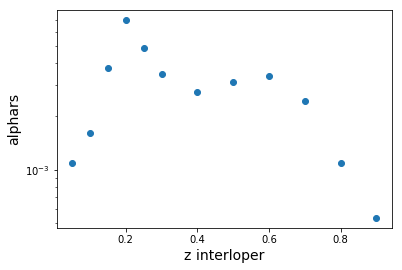

In [321]:
plt.plot(zds, [10**pf.pos[1] for pf in pso_fit_list], 'o')
#plt.axhline(y=3e-4, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('alphars', size=14)
plt.gca().set_yscale('log')

In [322]:
# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
# plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# #plt.ylim(0,.0001)
# plt.legend()

# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
# plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# plt.gca().set_yscale('log')
# #plt.ylim(1e-6,2e-4)
# plt.legend()

# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z3list], 'o', label='z=.3')
# plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z7list], 'o', label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# #plt.ylim(0,.0001)
# plt.legend()

In [329]:
masses_sketchy = np.array([get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs) for zd, pf in zip(zds, pso_fit_list)])
# the bigger this number, the weaker the mass

Text(0, 0.5, 'mass effective')

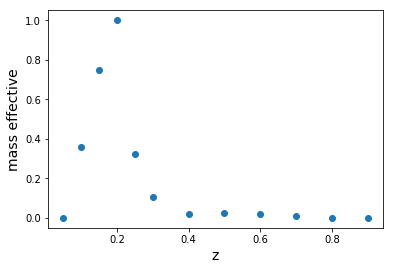

In [330]:
mass_interloper = 1e9
plt.plot(zds,mass_interloper/masses_sketchy, 'o')
plt.xlabel('z', size=14)
plt.ylabel('mass effective', size=14)
#plt.ylim(0,3)
#plt.gca().set_yscale('log')
#plt.ylim(1e-1,1e1)

157.7900918625754


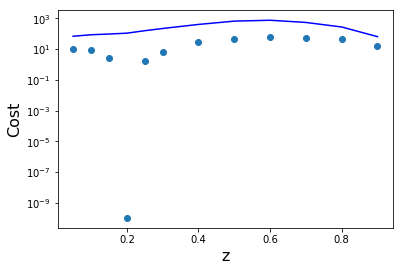

In [347]:
plt.plot(zds,[pf.cost for pf in pso_fit_list], 'o')
plt.xlabel('z', size=16)
plt.ylabel('Cost', size=16)
plt.plot(zds, smooth_cost_list, color='blue')
plt.gca().set_yscale('log')
print(smooth_cost)
#plt.savefig('imgs/typical_cost.pdf')

zd 0.05 (7.520351602658209)


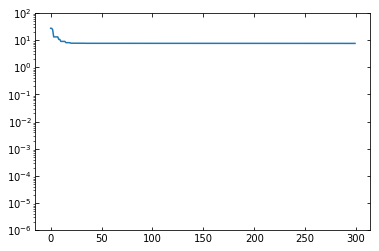

zd 0.1 (5.033549689193017)


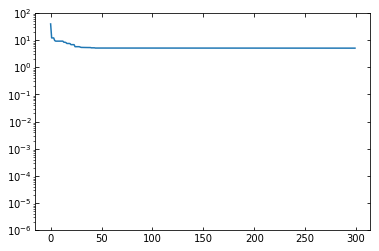

zd 0.15 (1.5558813164707497)


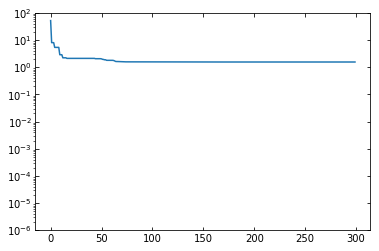

zd 0.2 (1.7960539762304823e-09)


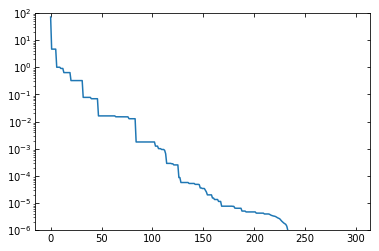

zd 0.25 (1.2397645820714407)


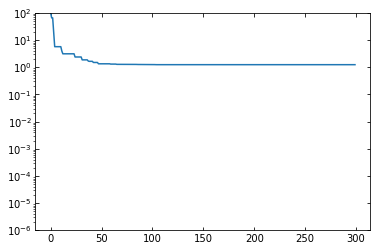

zd 0.3 (4.9910323089945985)


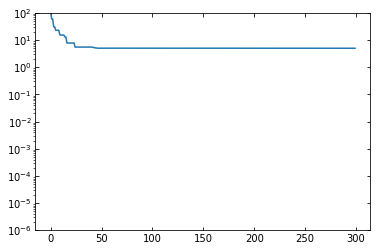

zd 0.35 (12.302445878838789)


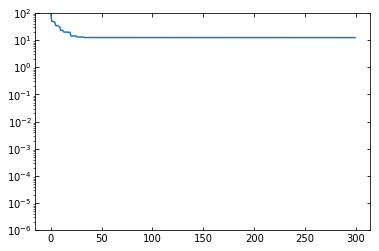

zd 0.4 (24.81015811679834)


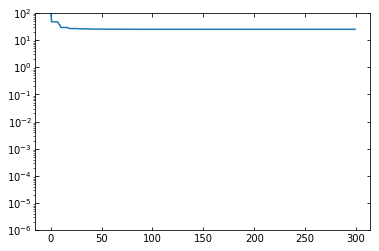

zd 0.6 (175.9837258351294)


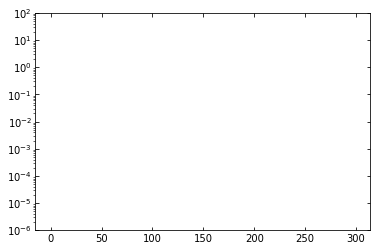

zd 0.8 (92.82018840004687)


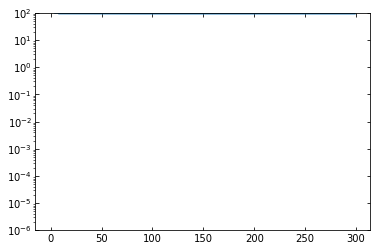

In [307]:
for zd, pso_fit in zip(zds, pso_fit_list):
    print('zd',zd, '({})'.format(pso_fit.cost))
    plt.plot(pso_fit.cost_history)
    plt.gca().set_yscale('log')
    plt.gca().tick_params(right=True, top=True, direction='in')
    plt.ylim(1e-6,1e2)
    plt.show()

cost 7.520351602658209
[0.9048204234269843, -2.9669852900223606, 4.605381512452492, 7.742899719884071]
[1.0236651094492797, 0.002569456258144631, array(4.54429335), array(8.81100711)]


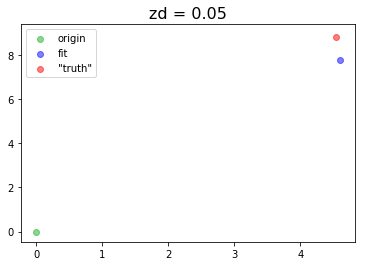

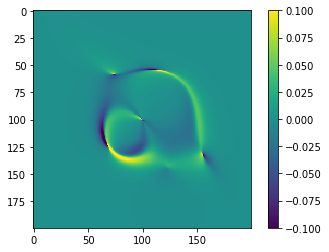

cost 5.033549689193017
[0.40052039517244603, -2.800631578661348, 4.727451507892336, 8.577739637586303]
[0.5428748802904887, 0.004518448165485852, array(4.54429335), array(8.81100711)]


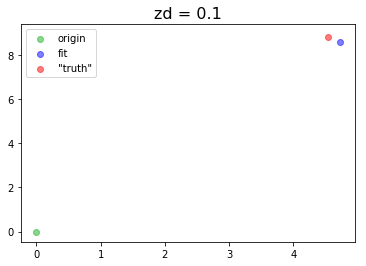

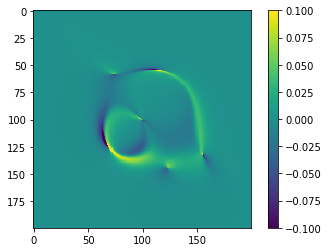

cost 1.5558813164707497
[-0.09504230758880639, -2.510469657983451, 4.511230956178592, 8.779146621260779]
[0.3831871921059272, 0.005950572582999349, array(4.54429335), array(8.81100711)]


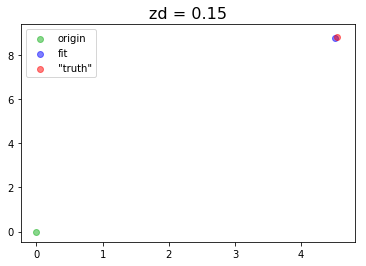

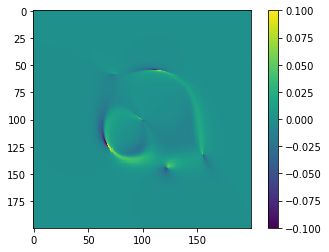

cost 1.7960539762304823e-09
[-0.5174388875741721, -2.1578675861817658, 4.544305543251172, 8.811011992443502]
[0.303784985137773, 0.0069522861831434945, array(4.54429335), array(8.81100711)]


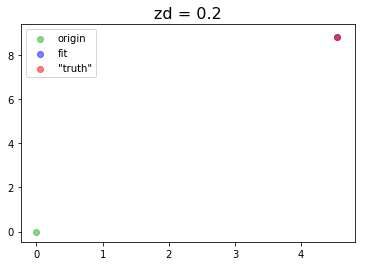

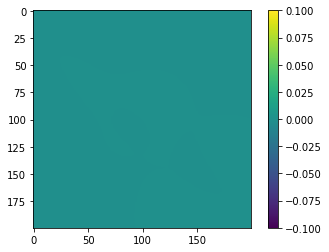

cost 1.2397645820714407
[-0.29644131454712386, -2.28694657999461, 4.990683828133344, 8.934231539156897]
[0.25650378991288353, 0.007596056799867502, array(3.53982575), array(6.86342792)]


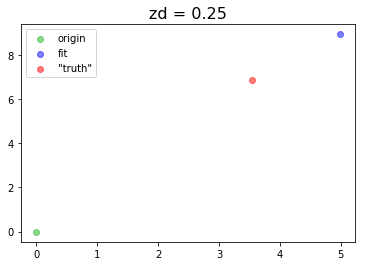

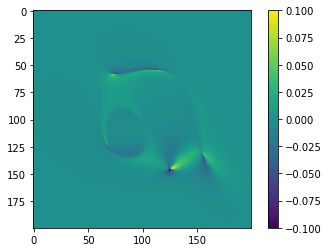

cost 4.9910323089945985
[-0.06386484678507554, -2.408209226357187, 5.2808969003694, 9.005772993520099]
[0.22528796282227068, 0.007942824217928144, array(2.85533478), array(5.53625682)]


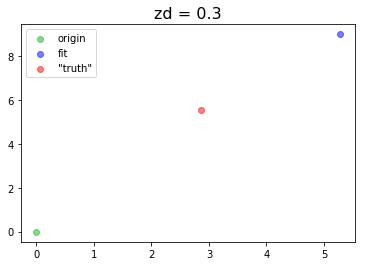

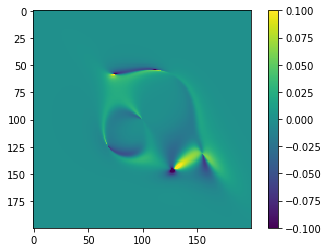

cost 12.302445878838789
[0.1516100161643234, -2.495487515179117, 5.303631081160237, 9.195878965142215]
[0.2032558684086175, 0.008043951944350952, array(2.35375775), array(4.56374064)]


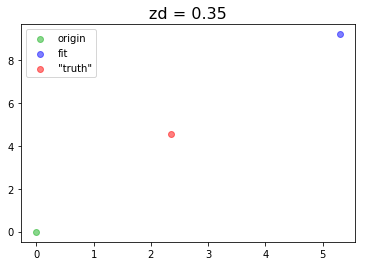

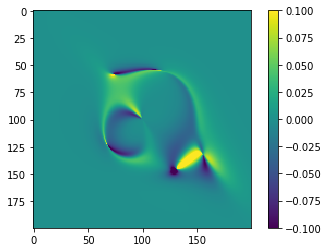

cost 24.81015811679834
[0.3626962941581616, -2.558786427599601, 4.645351207022872, 9.77918429094842]
[0.1869661773777564, 0.007942797250114358, array(1.96655312), array(3.81298306)]


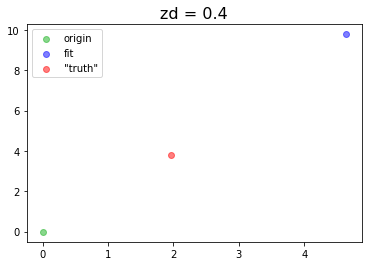

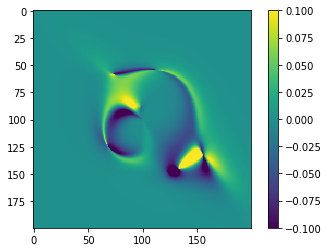

cost 175.9837258351294
[0.31063029387890373, -2.5134406401976572, -5.926182804345785, 5.489516544453514]
[0.15054372876563957, 0.006167925453386118, array(0.99008062), array(1.91968404)]


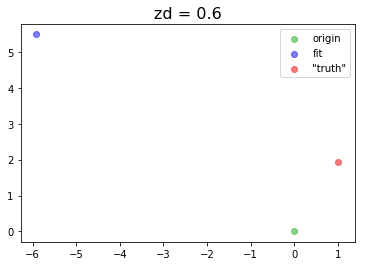

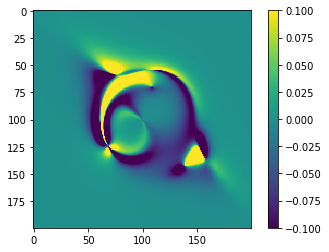

cost 92.82018840004687
[1.1848178629138126, -2.913140918283987, -14.9982388261202, 7.677790929806632]
[0.13426105027878538, 0.0032483648996562368, array(0.4147353), array(0.80413727)]


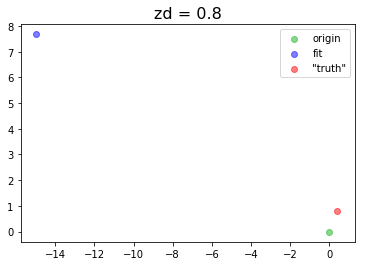

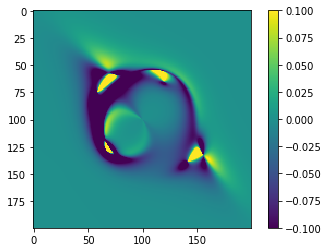

In [308]:
for zd,pf in zip(zds, pso_fit_list):
    nfw_idx = 2 if zl < zd else 1 # index of first nfw lens
    almost_truth_args = ([pf.image_obj.rsang, pf.image_obj.alphars]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_x'] for i in range(pf.N)]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_y'] for i in range(pf.N)])
    print('cost', pf.cost)
    print(list(pf.pos))
    print(list(almost_truth_args))
    
    plt.scatter([0],[0], color='xkcd:green', label='origin', alpha=.5)
    for idx in range(2,2+pf.N):
        plt.scatter(pf.pos[idx],pf.pos[idx+pf.N], color='blue', alpha=.5,
                    label='fit' if idx==2 else None)
        plt.scatter(almost_truth_args[idx], almost_truth_args[idx+pf.N], color='red', alpha=.5,
                    label='"truth"' if idx==2 else None)
    plt.legend()
    plt.title('zd = {}'.format(zd),fontsize=16)
    plt.show()
    
    masked = pf.pso_img-pf.image
    masked[100][100] = 0
    plt.imshow(masked, vmin=vmin, vmax=vmax); plt.colorbar()
    plt.show()

In [28]:
# almost_truth_args

In [29]:
#plt.imshow(pso_fit.almost_truth_img - pso_fit.image, vmin=vmin, vmax=vmax)

In [30]:
# get_mass_back(almost_truth_args[0], almost_truth_args[1], .5, 1)

In [31]:
# import pickle
# with open('pso_fit_list2.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

## Old cells...

In [32]:
def partition(liszt, n):
    ''' Divides a list `liszt` into `n` nearly equal parts 
    (useful for pooling)'''
    lenliszt = len(liszt)
    short = lenliszt//n # how long is a short part
    nlong = lenliszt - short*n # remainder after integer division
    
    # list of lengths
    length_list = [short]*(n-nlong) + [short+1]*nlong
    
    ans = []
    counter = 0
    for length in length_list:
        ans.append(liszt[counter:counter+length])
        counter += length
        
    return ans    